In [131]:
import ast
import pandas as pd
import sys
import matplotlib.pylab as plt
import operator
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pyfpgrowth
import timeit

In [132]:
uid_songid_file_location = './Dataset/all_dataset_numeric_with_HML.txt'

In [133]:
uid_songid_file = open(uid_songid_file_location)
uid_songid_file_data = []
for line in uid_songid_file:
    to_be_appended = line.strip().replace('[','').replace(']','').replace('"','').replace("'",'').strip().replace(' ','').split(',')
    uid_songid_file_data.append(to_be_appended)
uid_songid_file.close()
#uid_songid_file_data[7]

In [134]:
uid_songid_transaction_data = uid_songid_file_data
len(uid_songid_transaction_data)

110000

In [135]:
patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, 4)
len(patterns)

287219

In [136]:
sorted_patterns = sorted(patterns.items(), key=operator.itemgetter(1),reverse=True)
(sorted_patterns[100][0])

('12985H', '25150H')

In [137]:
calculate_length_itemsets_dict = {}
for itemset in sorted_patterns:
    itemset_len = len(itemset[0])
    if itemset_len in calculate_length_itemsets_dict:
        calculate_length_itemsets_dict[itemset_len] += 1
    else:
        calculate_length_itemsets_dict[itemset_len] = 1

In [138]:
calculate_length_itemsets_dict

{1: 54762, 2: 101521, 3: 71764, 4: 42828, 5: 14680, 6: 1595, 7: 67, 8: 2}

In [139]:
def get_length_itemsets_dict(uid_songid_transaction_data,min_sup):
    
    patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, min_sup)
    sorted_patterns = sorted(patterns.items(), key=operator.itemgetter(1),reverse=True)
    calculate_length_itemsets_dict = {}
    for itemset in sorted_patterns:
        itemset_len = len(itemset[0])
        if itemset_len in calculate_length_itemsets_dict:
            calculate_length_itemsets_dict[itemset_len] += 1
        else:
            calculate_length_itemsets_dict[itemset_len] = 1
        
    return calculate_length_itemsets_dict

In [140]:
itemset_lengths_list = []
itemset_frequency = []
for key,value in calculate_length_itemsets_dict.items():
    itemset_lengths_list.append(key)
    itemset_frequency.append(value)

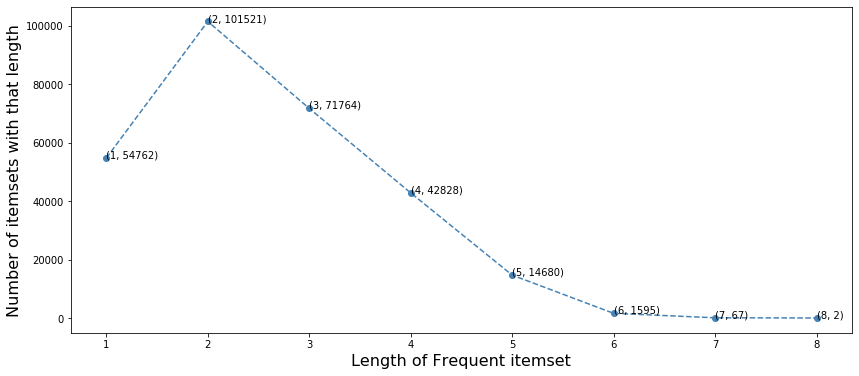

In [141]:
#Plot number of itemsets with respect to MIN_SUP 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(itemset_lengths_list, itemset_frequency, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Length of Frequent itemset", fontsize=16)
ax.set_ylabel("Number of itemsets with that length", fontsize=16)
for i in range(0,len(itemset_frequency)):
    plt.text(itemset_lengths_list[i], itemset_frequency[i],'({}, {})'.format(itemset_lengths_list[i], itemset_frequency[i]))
plt.show()

In [119]:
#Run FP and generate association rules for various different values of MIN_SUP

min_sup_array = [3,4,5,6,7,8,9,10]
OVERALL_itemset_frequency_array = []
OVERALL_length_itemset_array = []

for i in range(len(min_sup_array)):
    MIN_SUP = min_sup_array[i]
    print("Calculating for MIN_SUP = " + str(MIN_SUP))
    itemset_lengths_list = []
    itemset_frequency = []
    calculate_length_itemsets_dict = get_length_itemsets_dict(uid_songid_transaction_data,MIN_SUP)
    for key,value in calculate_length_itemsets_dict.items():
        itemset_lengths_list.append(key)
        itemset_frequency.append(value)
        
    OVERALL_itemset_frequency_array.append(itemset_frequency)
    OVERALL_length_itemset_array.append(itemset_lengths_list)

Calculating for MIN_SUP = 3
Calculating for MIN_SUP = 4
Calculating for MIN_SUP = 5
Calculating for MIN_SUP = 6
Calculating for MIN_SUP = 7
Calculating for MIN_SUP = 8
Calculating for MIN_SUP = 9
Calculating for MIN_SUP = 10


In [120]:
OVERALL_itemset_frequency_array

[[67871, 186076, 145007, 113847, 64595, 19121, 3482, 459, 43, 2],
 [54762, 101521, 71764, 42828, 14680, 1595, 67, 2],
 [46110, 66060, 42684, 21390, 4403, 198, 2],
 [39593, 47210, 28031, 12268, 1555, 39],
 [34754, 35698, 19637, 7427, 663, 5],
 [30782, 28116, 14566, 4638, 313, 1],
 [27794, 22744, 11139, 3016, 142],
 [25289, 19026, 8797, 2102, 70]]

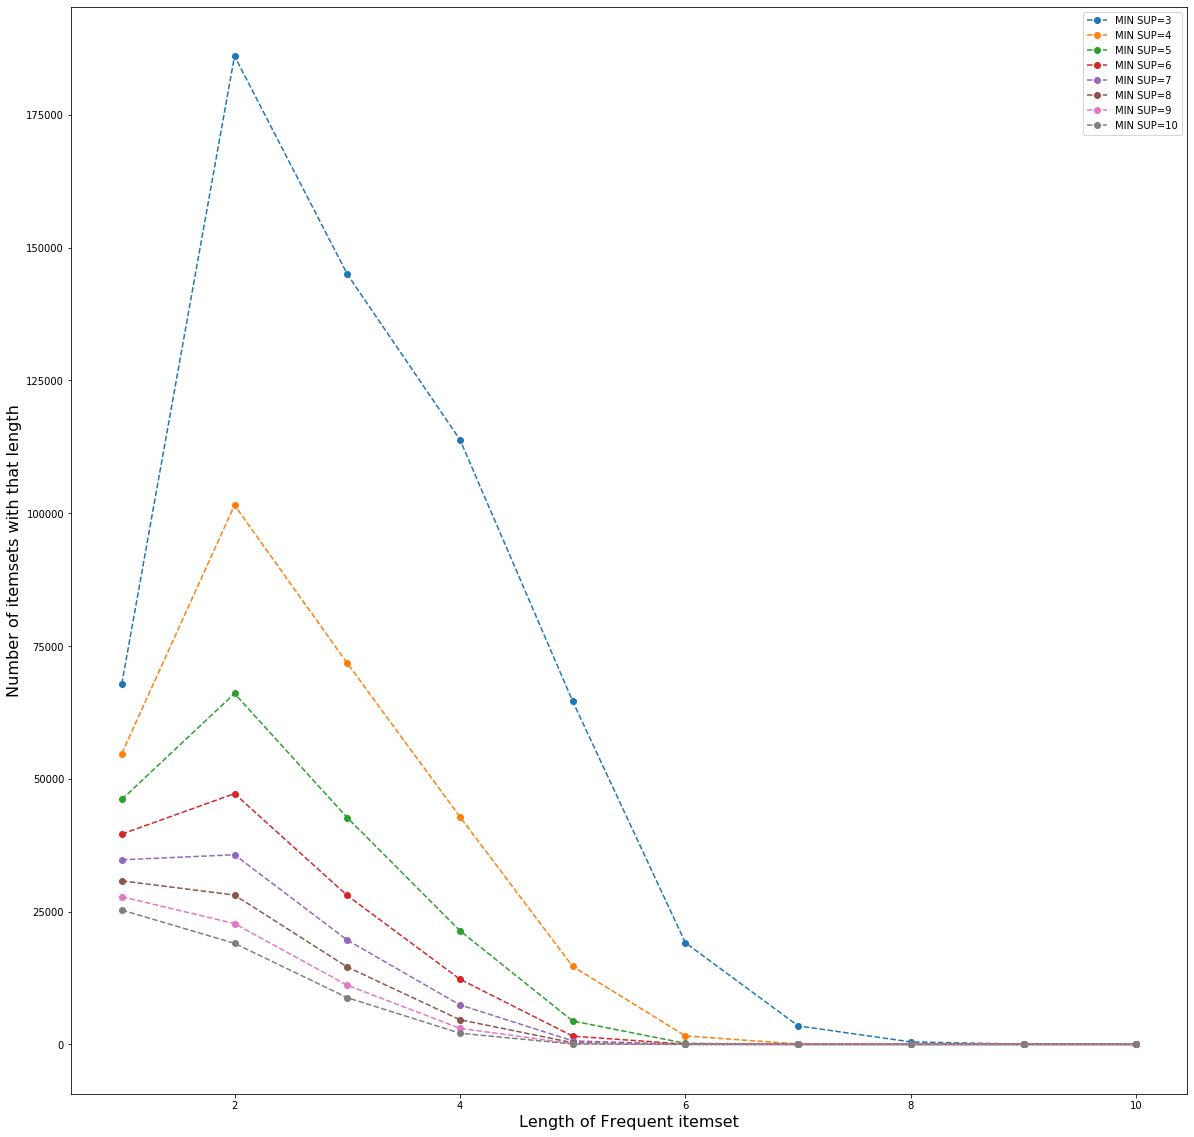

In [121]:
#Plot number of association rules with respect to Confidence Values for different support values

MAX_LEN_ITEMSET = 0
for i in OVERALL_length_itemset_array:
    max_len_itemset = max(i)
    if(max_len_itemset > MAX_LEN_ITEMSET):
        MAX_LEN_ITEMSET =  max_len_itemset
        
NUM_ITEMSET_ARRAY = list(range(1,MAX_LEN_ITEMSET+1))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

for i in range(0,len(min_sup_array)):
    
    array_to_be_plotted = [0] * (MAX_LEN_ITEMSET)
    array_for_this_sup = OVERALL_itemset_frequency_array[i]
    for j in range(0,len(array_for_this_sup)):
        array_to_be_plotted[j] = array_for_this_sup[j]
    ax.plot(NUM_ITEMSET_ARRAY, array_to_be_plotted, linestyle='--', marker='o',label="MIN SUP=" + str(min_sup_array[i]))
    
ax.set_xlabel("Length of Frequent itemset", fontsize=16)
ax.set_ylabel("Number of itemsets with that length", fontsize=16)
ax.legend()
# for i in range(0,len(num_association_rules_array)):
#     plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()

In [122]:
patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, 5)
len(patterns)

180847

In [123]:
sorted_patterns = sorted(patterns.items(), key=operator.itemgetter(1),reverse=True)

In [124]:
relevant_itemsets= []
for itemset in sorted_patterns:
    #print(itemset[0][0])
    if( len(itemset[0]) == 1):
        continue
    else:
        relevant_itemsets.append(list(itemset[0]))
#relevant_itemsets

In [125]:
rules = pyfpgrowth.generate_association_rules(patterns, 0)
len(rules)
#rules

33561

In [126]:
for i in range(0,10):
    print(relevant_itemsets[i])

['12985L', '25150L']
['14397L', '217471L']
['217471L', '91177L']
['14397L', '91177L']
['12985L', '288653L']
['25150L', '288653L']
['177172L', '54386L']
['177172L', '91177L']
['217471L', '54386L']
['54386L', '91177L']


In [129]:
with open('./Dataset/frequent_itemsets_FP_growth_all_dataset_with_HML.txt', 'w') as filehandle:
    for itemset in relevant_itemsets:
        filehandle.write('%s\n' % itemset)

In [ ]:
uid_songid_file_data[0]